# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Also Note
* I built in a 60-second wait after every 50 records to keep from getting blocked by the endpoint.

In [2]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import time

# Import API key
from env.api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info

found_cities = []
clouds = []
country = []
dt = []
humidity = []
temp_max = []
wind = []
lat = []
lon = []

# Set the date of data collection for later use.
date = pd.to_datetime('today').strftime('%m/%d/%y')

# Set up record and set counters
record = 0
set = 1
setsize = 50

# Loop through the list of cities and perform a request for data on each
for city in cities:
    if record > setsize:
        set +=1
        record = 0
        # Sleep for a minute since we're only allowed 60 requests per minute
        time.sleep(60)
    else:
        print(f"Processing Record {record} of Set {set} | {city}")
        response = requests.get(query_url + city).json()
        try:
            clouds.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            dt.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp_max.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])
            found_cities.append(city)
            record += 1
 
        except:
            print(f"City \033[1m{city}\033[0m not found. Skipping...")
        
           
print ("""-----------------------------
Data Retrieval Complete      
-----------------------------""")


Processing Record 0 of Set 1 | san patricio
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | zunyi
Processing Record 6 of Set 1 | mys shmidta
City mys shmidta not found. Skipping...
Processing Record 6 of Set 1 | airai
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | key largo
Processing Record 12 of Set 1 | gladstone
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | filingue
Processing Record 16 of Set 1 | leh
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | palmer
Processing Record 19 of Set 1 | harper
Processing Record 20 of Set 1 | maceio
Processing Record 21 of Set 1 | pacific grove
Processing Record 22 of Set

Processing Record 22 of Set 4 | bengkulu
Processing Record 23 of Set 4 | mandera
Processing Record 24 of Set 4 | meulaboh
Processing Record 25 of Set 4 | souillac
Processing Record 26 of Set 4 | avarua
Processing Record 27 of Set 4 | port macquarie
Processing Record 28 of Set 4 | ozernovskiy
Processing Record 29 of Set 4 | erzin
Processing Record 30 of Set 4 | chupaca
Processing Record 31 of Set 4 | honiara
Processing Record 32 of Set 4 | phan thiet
Processing Record 33 of Set 4 | havre-saint-pierre
Processing Record 34 of Set 4 | wilmington
Processing Record 35 of Set 4 | barao de melgaco
Processing Record 36 of Set 4 | novobirilyussy
Processing Record 37 of Set 4 | dalinghe
City dalinghe not found. Skipping...
Processing Record 37 of Set 4 | gizo
Processing Record 38 of Set 4 | burgeo
Processing Record 39 of Set 4 | port alfred
Processing Record 40 of Set 4 | mucurapo
Processing Record 41 of Set 4 | rio gallegos
Processing Record 42 of Set 4 | aswan
Processing Record 43 of Set 4 | la

Processing Record 34 of Set 7 | iracoubo
Processing Record 35 of Set 7 | tome
Processing Record 36 of Set 7 | lolua
City lolua not found. Skipping...
Processing Record 36 of Set 7 | dao
Processing Record 37 of Set 7 | zelenoborsk
Processing Record 38 of Set 7 | paamiut
Processing Record 39 of Set 7 | goderich
Processing Record 40 of Set 7 | dongsheng
Processing Record 41 of Set 7 | samarai
Processing Record 42 of Set 7 | thunder bay
Processing Record 43 of Set 7 | aflu
City aflu not found. Skipping...
Processing Record 43 of Set 7 | gazojak
Processing Record 44 of Set 7 | kamenskoye
City kamenskoye not found. Skipping...
Processing Record 44 of Set 7 | karaidel
Processing Record 45 of Set 7 | merauke
Processing Record 46 of Set 7 | korla
Processing Record 47 of Set 7 | koslan
Processing Record 48 of Set 7 | vao
Processing Record 49 of Set 7 | brigantine
Processing Record 50 of Set 7 | tombouctou
Processing Record 0 of Set 8 | beira
Processing Record 1 of Set 8 | tanda
Processing Record

City malwan not found. Skipping...
Processing Record 1 of Set 11 | makasar
Processing Record 2 of Set 11 | sao jose da coroa grande
Processing Record 3 of Set 11 | la asuncion
Processing Record 4 of Set 11 | keti bandar
Processing Record 5 of Set 11 | barbar
City barbar not found. Skipping...
Processing Record 5 of Set 11 | hare bay
Processing Record 6 of Set 11 | nsanje
Processing Record 7 of Set 11 | sioux lookout
Processing Record 8 of Set 11 | nemuro
Processing Record 9 of Set 11 | chilca
Processing Record 10 of Set 11 | peravurani
Processing Record 11 of Set 11 | guilin
Processing Record 12 of Set 11 | massaguet
Processing Record 13 of Set 11 | kendari
Processing Record 14 of Set 11 | alugan
Processing Record 15 of Set 11 | lida
Processing Record 16 of Set 11 | pangody
Processing Record 17 of Set 11 | balikpapan
Processing Record 18 of Set 11 | kholm
Processing Record 19 of Set 11 | constitucion
Processing Record 20 of Set 11 | bireun
Processing Record 21 of Set 11 | kimbe
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create a dataframe from the weather information lists.
cities_df = pd.DataFrame({
    'City':found_cities,
    'Cloudiness':temp_max,
    'Country':country,
    'Date':dt,
    'Humidity':humidity,
    'Lat':lat,
    'Lng':lon,
    'Max Temp':temp_max,
    'Wind Speed':wind
})

In [10]:
# Export the city data to a .csv.
outfile = "output_data/cities.csv"
cities_df.to_csv(outfile, index=False, header=True)

In [11]:
# Display the dataframe value counts.
cities_df.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [12]:
# Display the dataframe.
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,san patricio,86.00,MX,1579738050,74,19.22,-104.70,86.00,11.41
1,barrow,-2.20,US,1579738226,77,71.29,-156.79,-2.20,10.29
2,hasaki,41.00,JP,1579738213,86,35.73,140.83,41.00,1.12
3,punta arenas,51.80,CL,1579738060,71,-53.15,-70.92,51.80,12.75
4,hermanus,70.00,ZA,1579738003,85,-34.42,19.23,70.00,8.99
...,...,...,...,...,...,...,...,...,...
561,lata,48.20,PT,1579738949,93,40.16,-8.33,48.20,4.70
562,vadso,23.00,NO,1579738949,73,70.07,29.75,23.00,33.33
563,prince rupert,44.60,CA,1579738847,75,54.32,-130.32,44.60,10.29
564,acarau,76.95,BR,1579738949,90,-2.89,-40.12,76.95,3.62


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


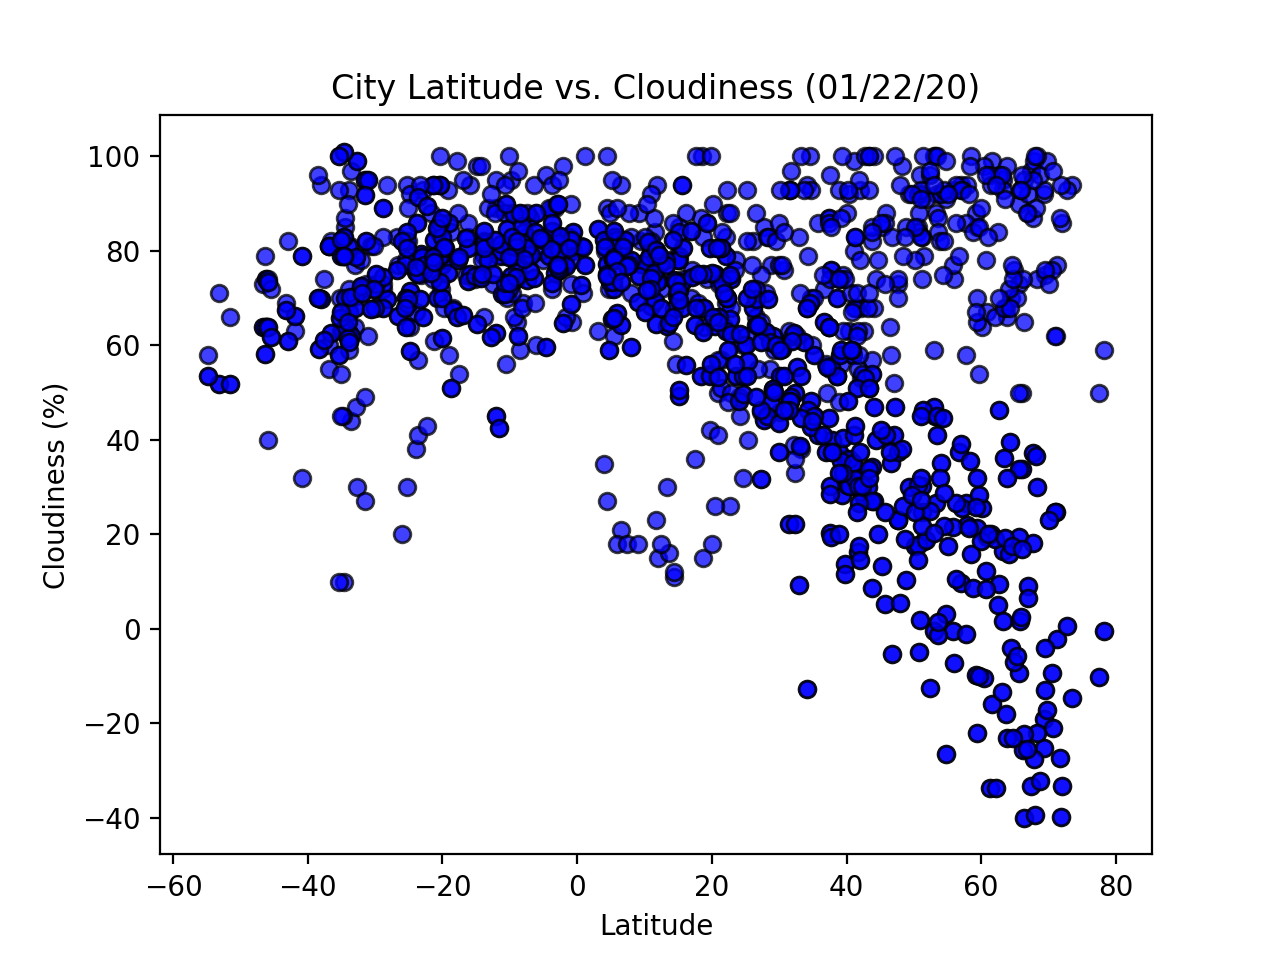

In [13]:
x_axis = cities_df['Lat']
data = cities_df['Max Temp']
plt.title("City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.savefig("output_data/all_max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

In [14]:
x_axis = cities_df['Lat']
data = cities_df['Humidity']
plt.title("City Latitude vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.savefig("output_data/all_humidity.png")
plt.show()

#### Comments
* The Latitude vs. Humidity Plot shows the level of relative humidity based on latitude. 
* The majority of the cities have a level above 50%.

#### Latitude vs. Cloudiness Plot

In [15]:
x_axis = cities_df['Lat']
data = cities_df['Cloudiness']
plt.title("City Latitude vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.savefig("output_data/all_cloudiness.png")
plt.show()

#### Comments
* The Latitude vs. Cloudiness Plot shows the level of cloudiness based on latitude.
* Cloudiness generally decreases as the latitude increases.

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


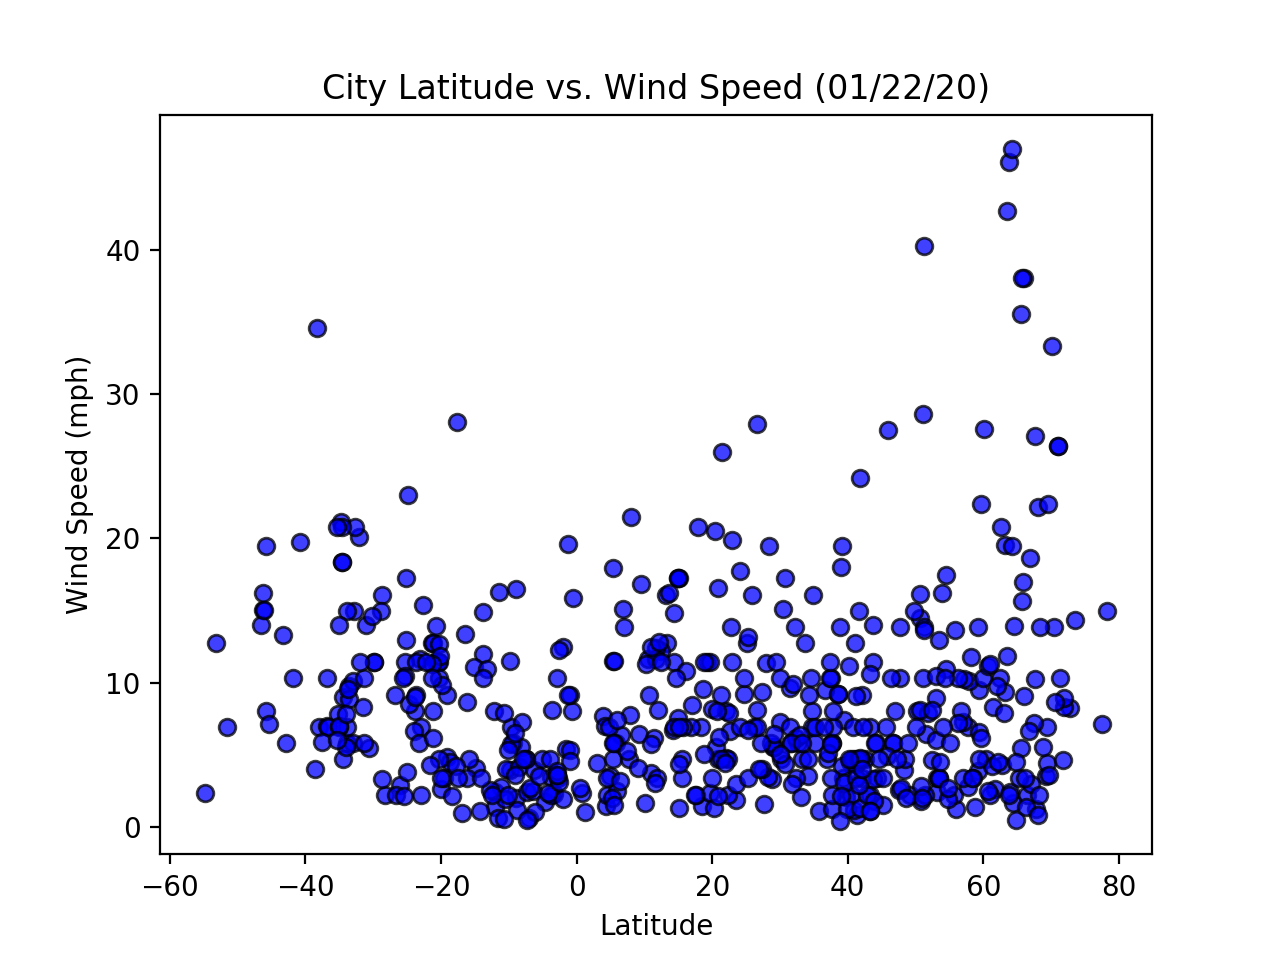

In [16]:
x_axis = cities_df['Lat']
data = cities_df['Wind Speed']
plt.title("City Latitude vs. Wind Speed (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.savefig("output_data/all_wind_speed.png")
plt.show()

#### Comments
* The Latitude vs. Wind Speed Plot shows the wind speed based on latitude. 
* Most cities have a wind speed below 20 mph.

## Linear Regression

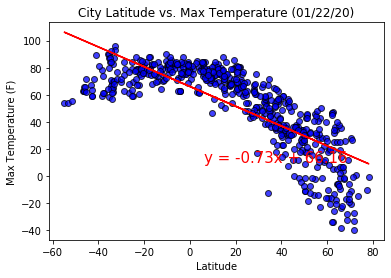

In [88]:
# OPTIONAL: Create a function to create Linear Regression plots
x_axis = cities_df['Lat']
data = cities_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()


In [20]:
# Create Northern and Southern Hemisphere DataFrames
northern_cities_df = cities_df.loc[cities_df['Lat'] > 0]
southern_cities_df = cities_df.loc[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


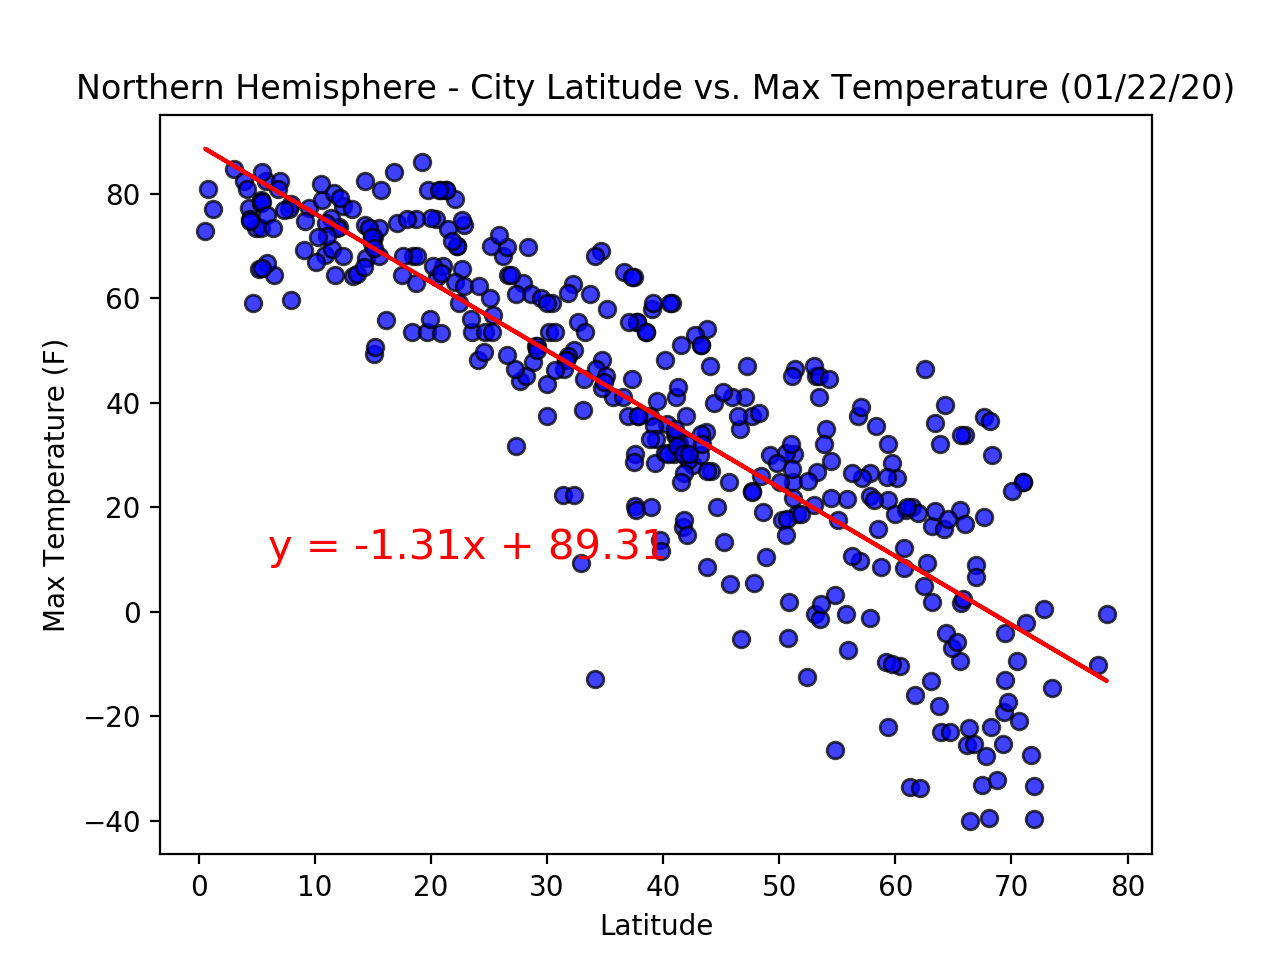

In [21]:
x_axis = northern_cities_df['Lat']
data = northern_cities_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/north_regress_max_temp.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


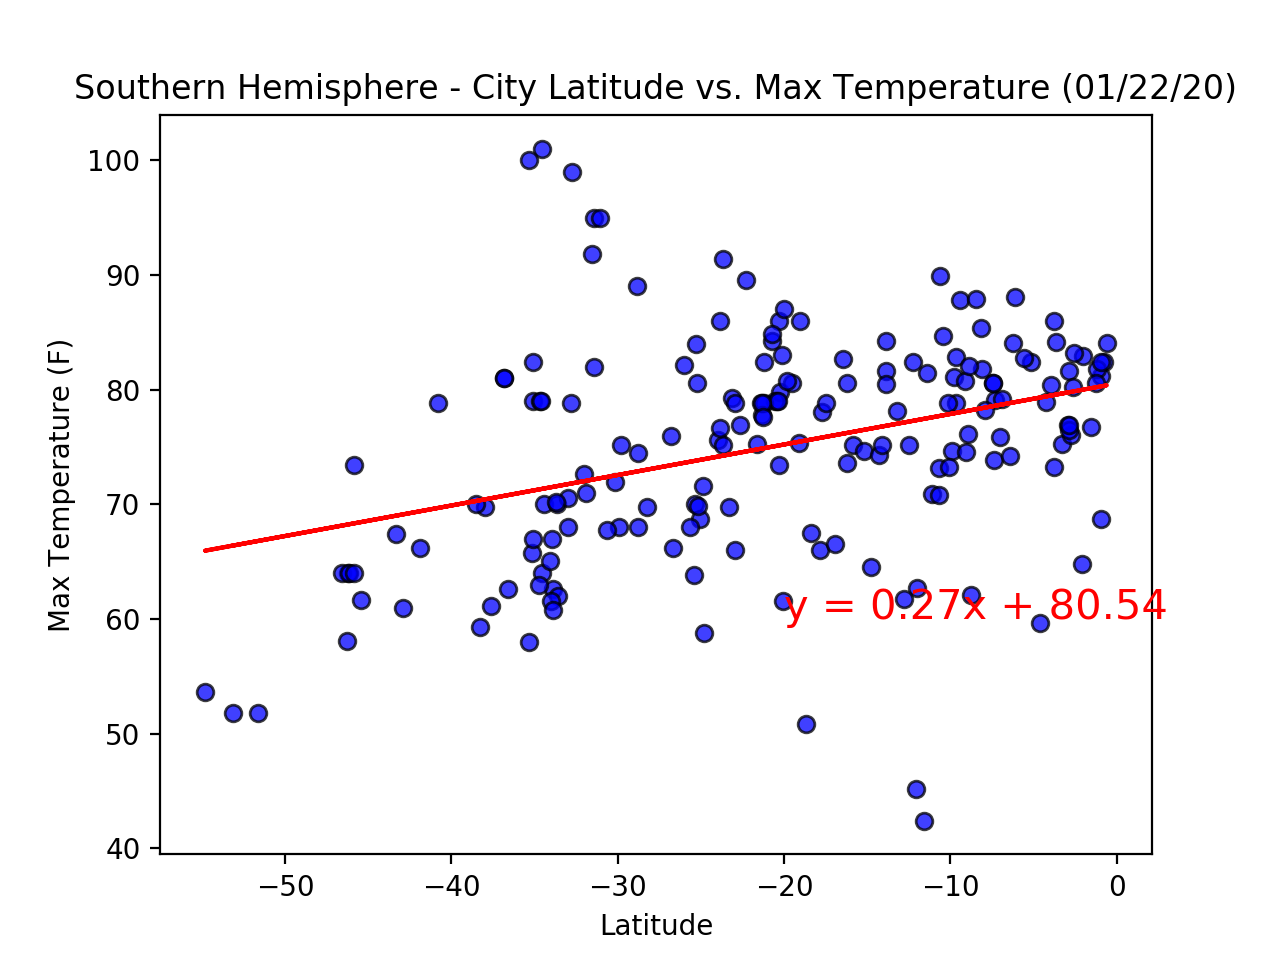

In [22]:
x_axis = southern_cities_df['Lat']
data = southern_cities_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-20,60),fontsize=15,color="red")
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/south_regress_max_temp.png")
plt.show()


#### Comments
* The "Northern Hemisphere - Max Temp vs. Latitude Linear Regression" plot and "Southern Hemisphere - Max Temp vs. Latitude Linear Regression" plot show maximum temperature by latitude.
* As latitude increases in the Northern Hemisphere, the maximum temperature decreases.
* As latitude increases in the Southern Hemisphere, the maximum temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


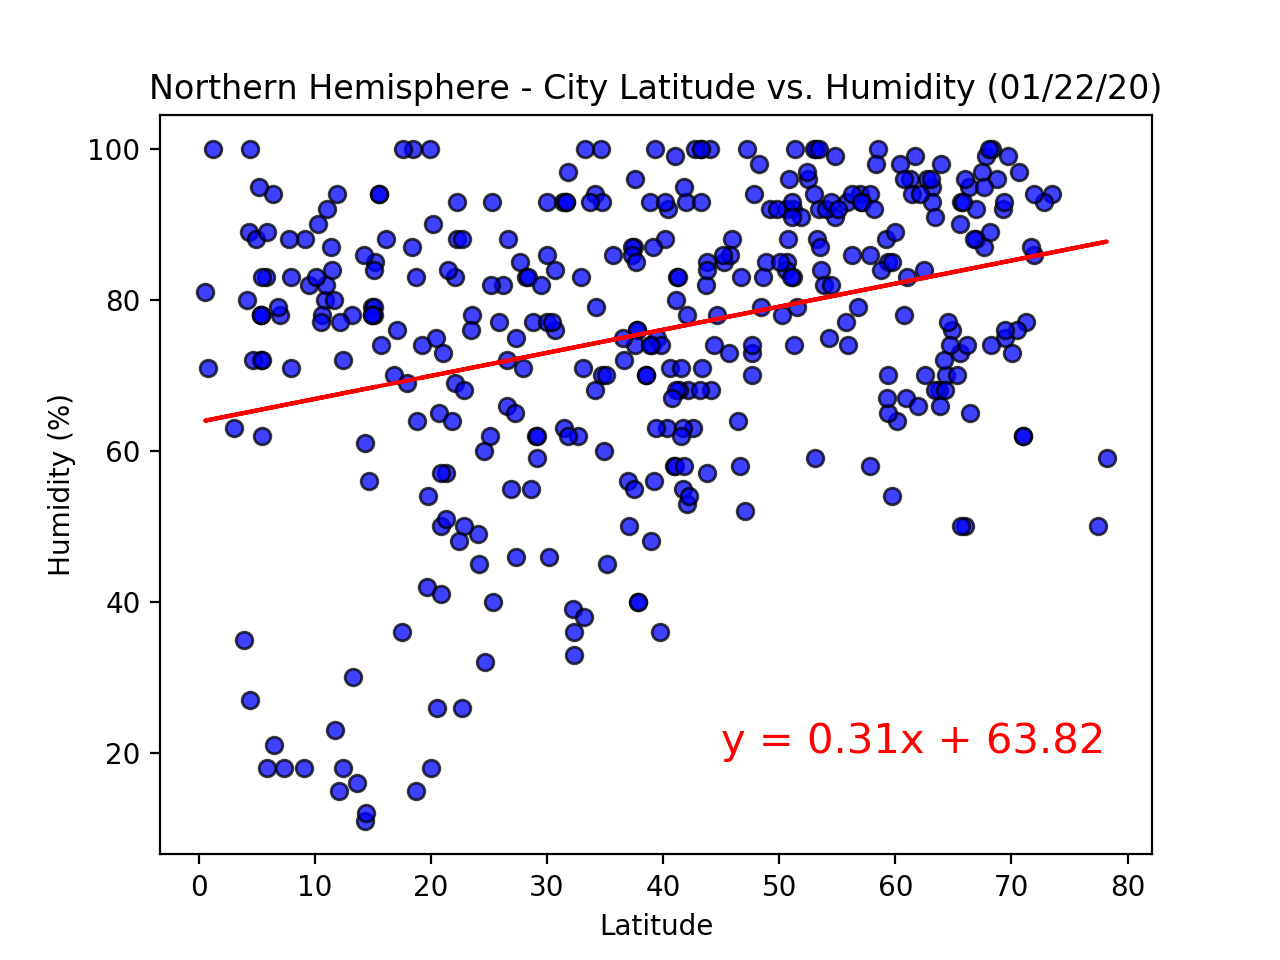

In [23]:
x_axis = northern_cities_df['Lat']
data = northern_cities_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(45,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - City Latitude vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/north_regress_humidity.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


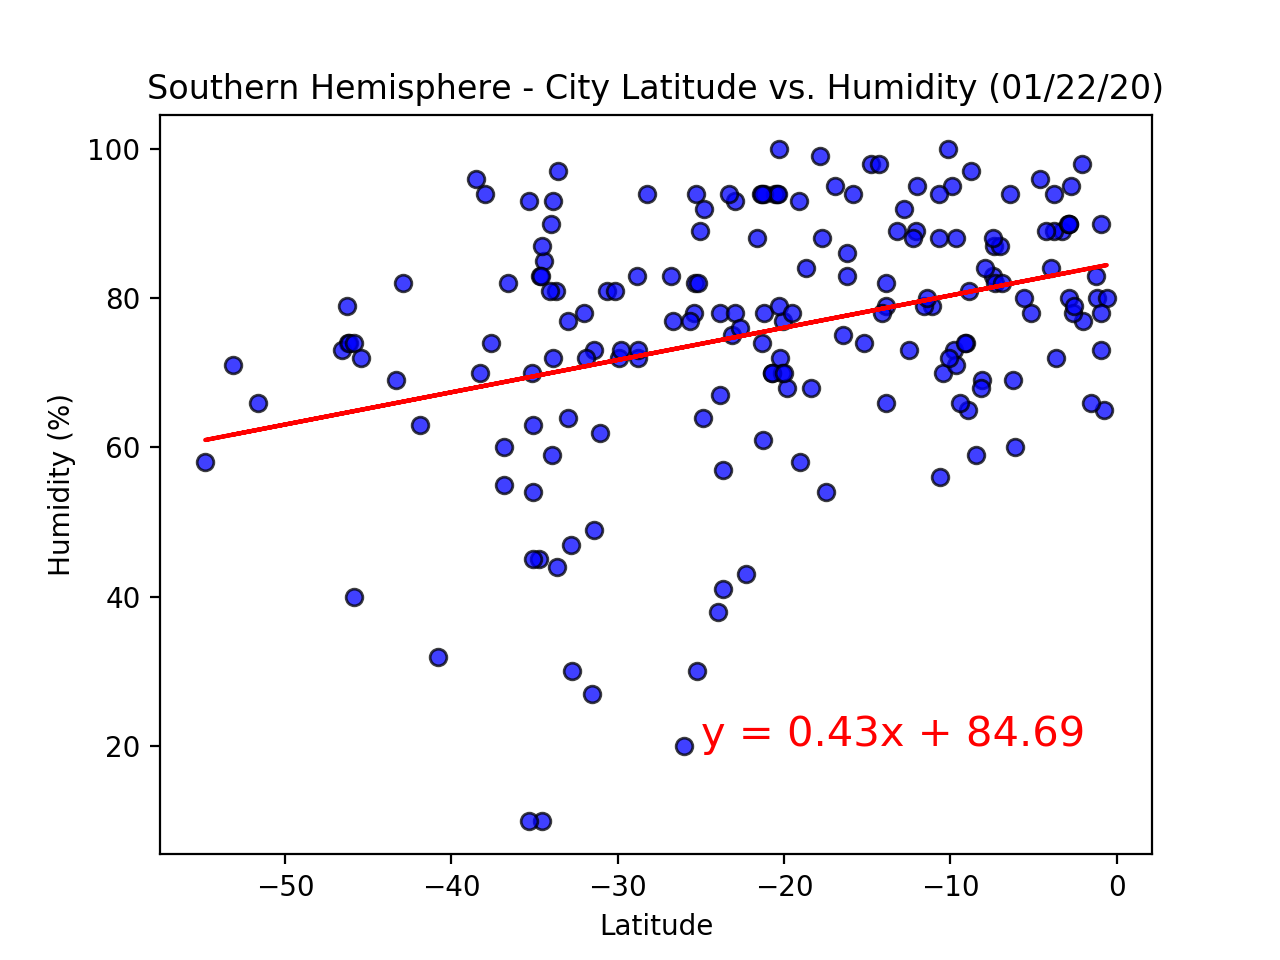

In [24]:
x_axis = southern_cities_df['Lat']
data = southern_cities_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(-25,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - City Latitude vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/south_regress_humidity.png")
plt.show()

#### Comments
* The "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression" plot and "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression" plot show maximum temperature by latitude.
* As latitude increases in the Northern Hemisphere, the humidity increases.
* As latitude increases in the Southern Hemisphere, the humidity increases.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


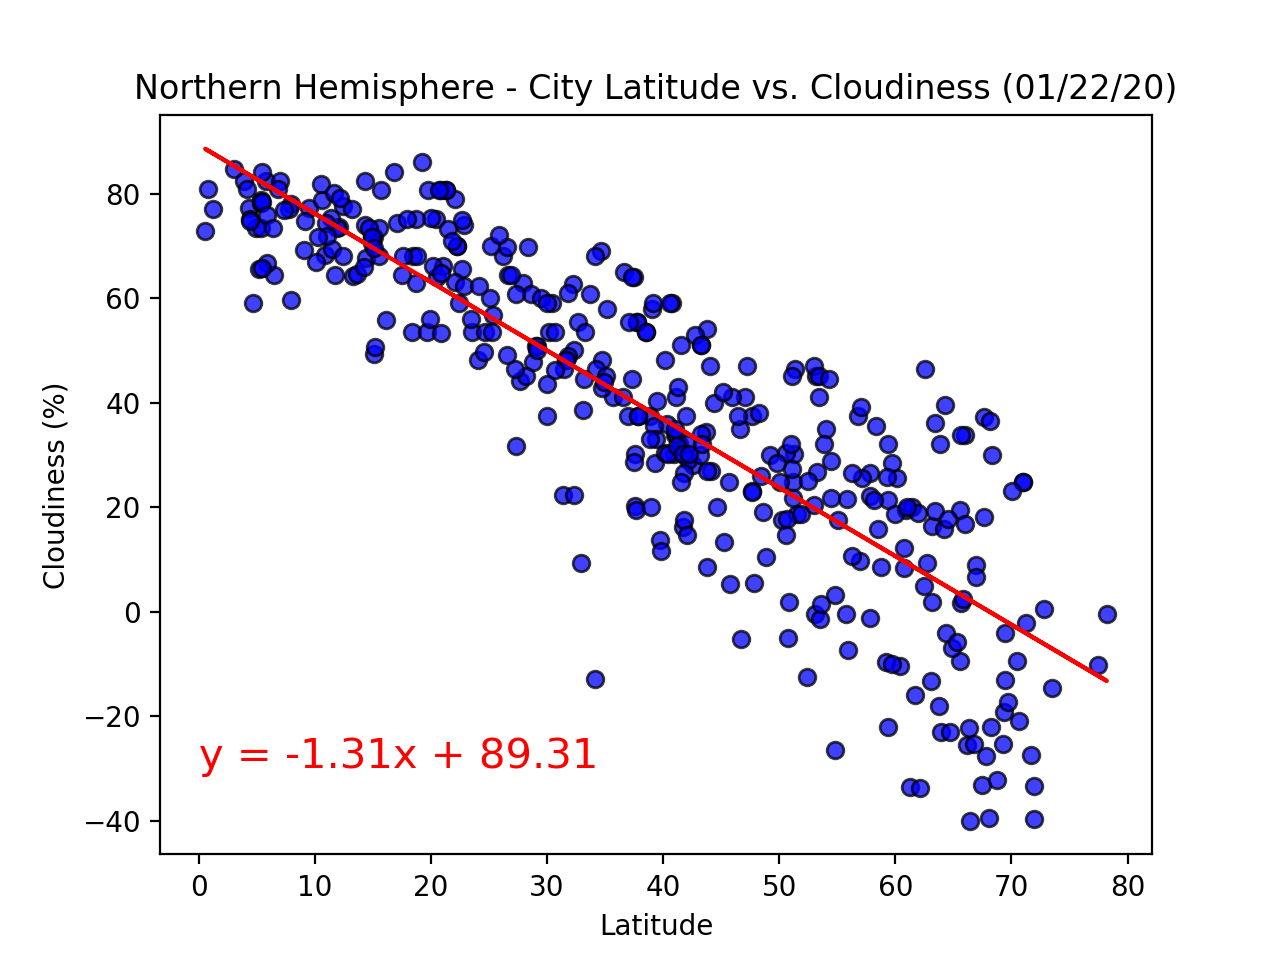

In [25]:
x_axis = northern_cities_df['Lat']
data = northern_cities_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(0,-30),fontsize=15,color="red")
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/north_regress_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


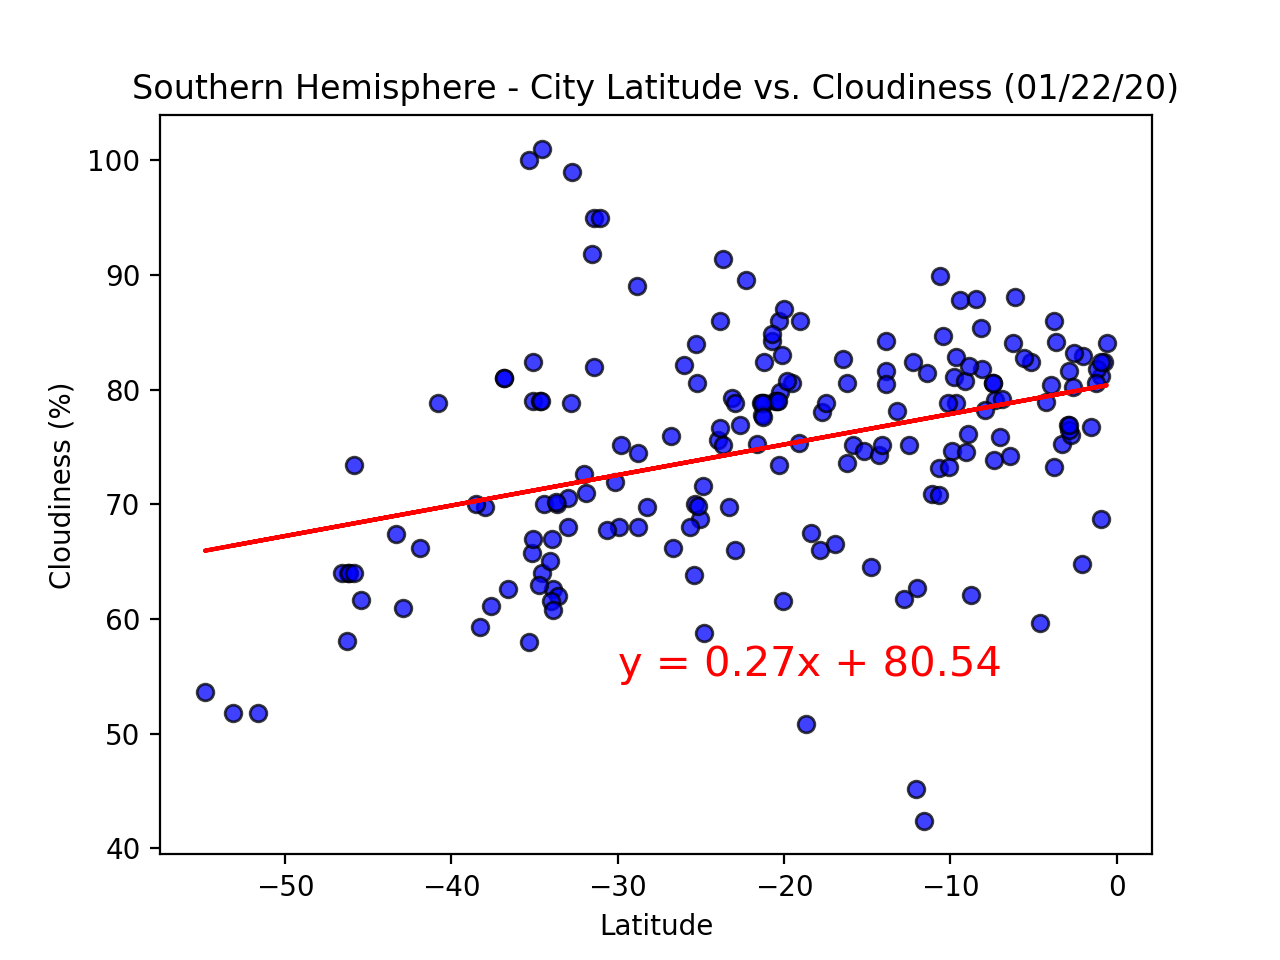

In [26]:
x_axis = southern_cities_df['Lat']
data = southern_cities_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(-30,55),fontsize=15,color="red")
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/south_regress_cloudiness.png")
plt.show()

#### Comments
* The "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression" plot and "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression" plot show cloudiness by latitude.
* As latitude increases in the Northern Hemisphere, the cloudiness decreases.
* As latitude increases in the Southern Hemisphere, the cloudiness increases.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


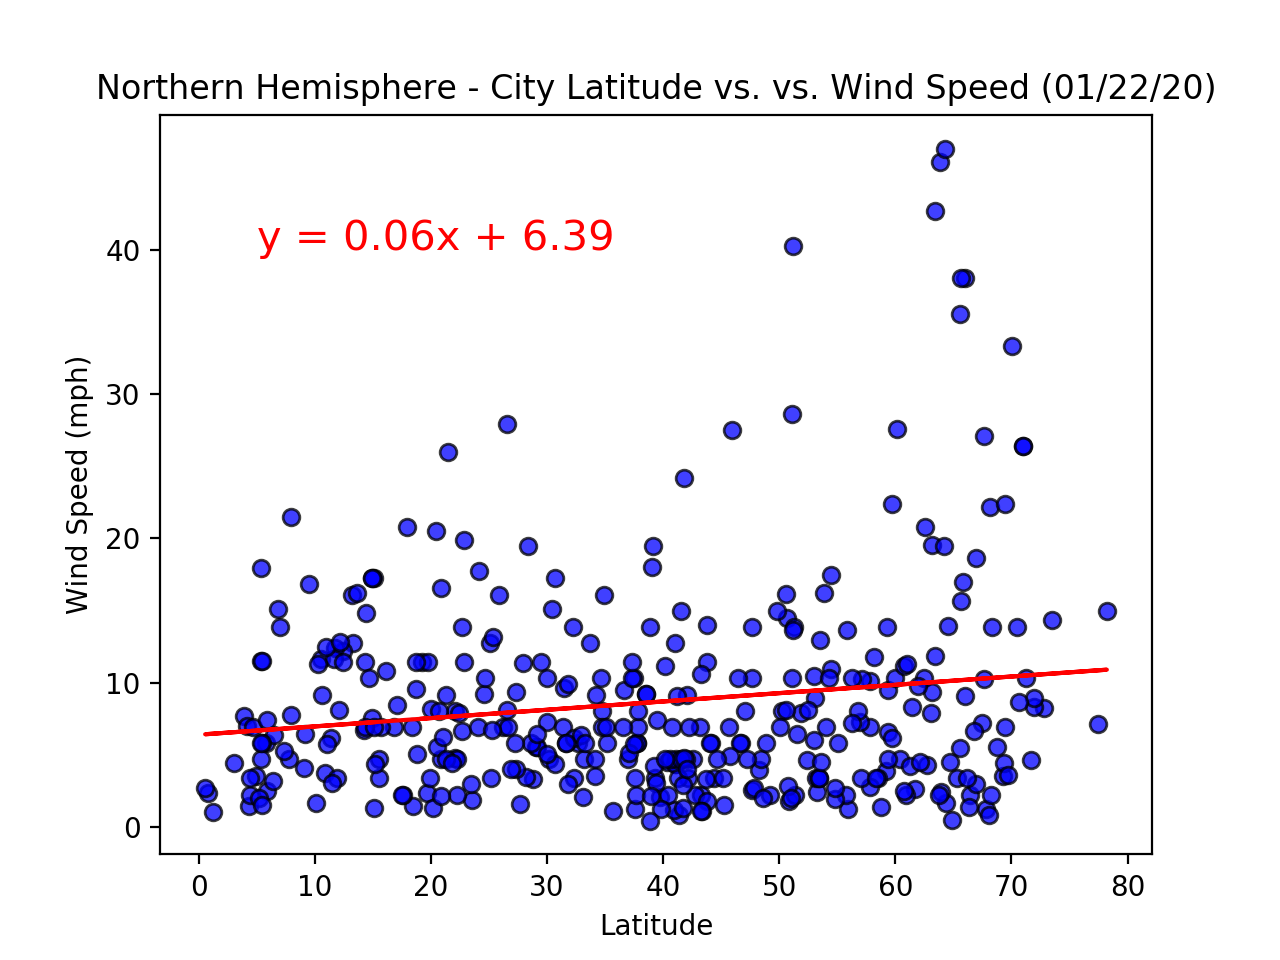

In [27]:
x_axis = northern_cities_df['Lat']
data = northern_cities_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(5,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - City Latitude vs. vs. Wind Speed (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/north_regress_wind_speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


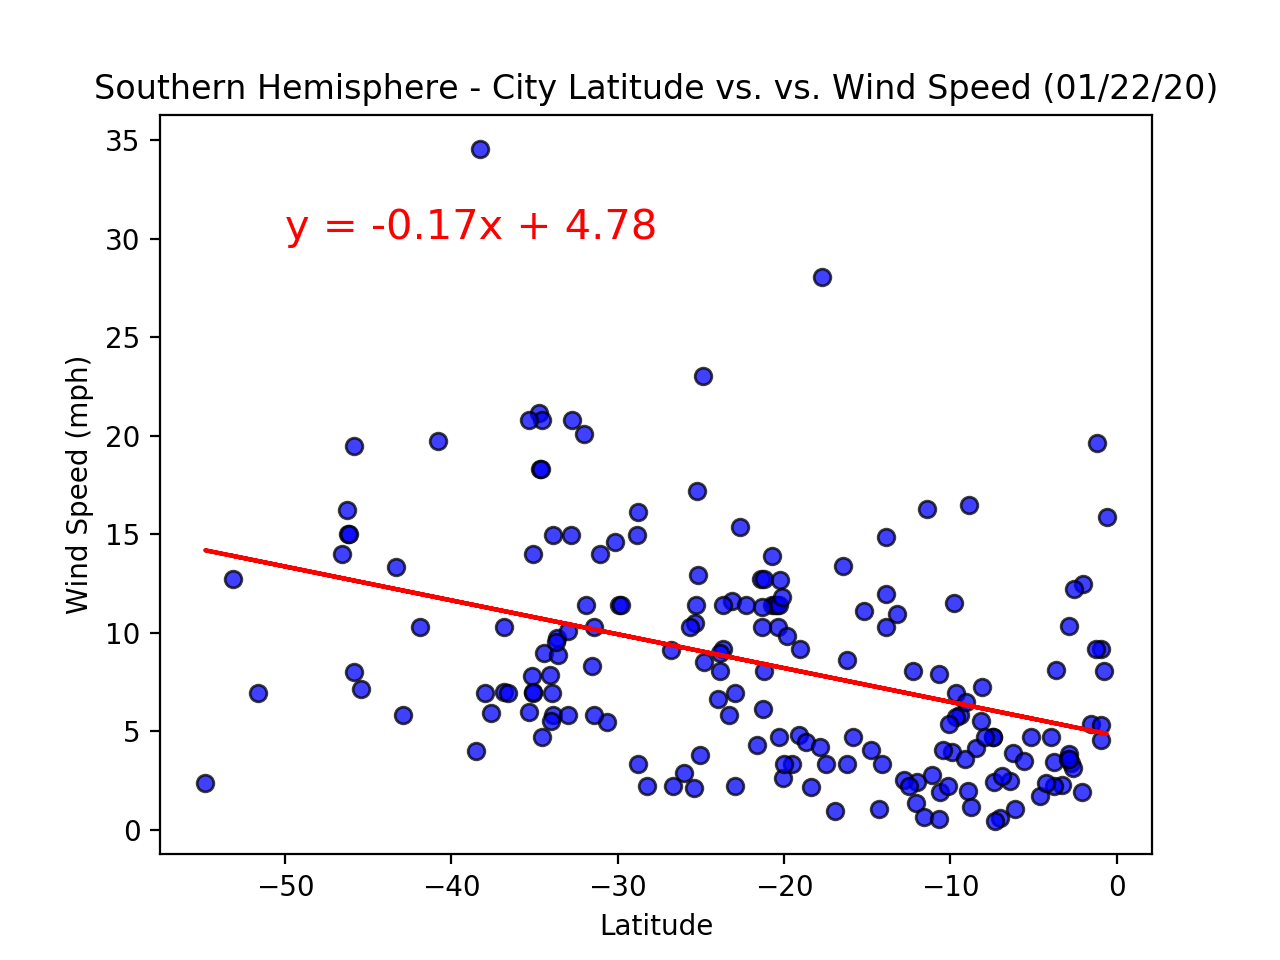

In [28]:
x_axis = southern_cities_df['Lat']
data = southern_cities_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(-50,30),fontsize=15,color="red")
plt.title("Southern Hemisphere - City Latitude vs. vs. Wind Speed (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/south_regress_wind_speed.png")
plt.show()

#### Comments
* The "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression" plot and "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression" plot show wind speed by latitude.
* As latitude increases in the Northern Hemisphere, the wind speed slightly increases.
* As latitude increases in the Southern Hemisphere, the wind speed slightly decreases.